# Personal Pandas Summary
**Sources:**
- DataSchool.io on Youtube https://www.youtube.com/watch?v=hl-TGI4550M&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=2&t=0s
- to be continued



## 1. Basic Setup ##

In [85]:
#Import the Packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Get the dataset - maybe put the data somewhere central
ri = pd.read_csv("pandas/police.csv")

## 2. Examine the Data ##

In [88]:
#basic look on the dataset
ri.head(n=5)       #Return the first `n` rows.
ri.tail(n=5)       #Return the last `n` rows.
ri.shape           #Return a tuple representing the dimensionality of the DataFrame.
ri.dtypes          #Return the dtypes in the DataFrame
ri.isnull().shape  #Detect missing values. Returns Series

(91741, 14)

## 3. Filtering, Ordering, Mapping
### 3. 1. Remove columns (with only missing values) ###

In [87]:
#General removing by name of column/index
ri.drop("county_name", axis="columns", inplace=True) #See shift+tab for details
#Remove Columns with only NaN
ri.dropna(axis="columns", how="all").shape

(91741, 14)

### 3. 2. Filtering

In [93]:
#Basic filtering after Column-name
ri[ri["violation"] == "Speeding"]   #ri[ri.violation =="Speeding"]
#multiple conditions: --> mind the paranthesis
ri[(ri["violation"] == "Speeding") & (ri["driver_gender"] == "M")].shape

(32979, 15)

### 3.3 Mapping
Map values of Series according to input correspondence.
Substitute each value in a Series with another value, that may be derived from a function, a dict or a Series.

In [124]:
#Easiest first: Dict:
duration = {
    "0-15 Min":"short", 
    "16-30 Min":"medium", 
    "30+ Min":"long" 
}

ri["Mapped"] = ri["stop_duration"].map(duration)
ri["Mapped"].value_counts(dropna=False)

# values in Series that are not in the dictionary (as keys) are converted to NaN

short     69543
medium    13635
NaN        5335
long       3228
Name: Mapped, dtype: int64

In [136]:
#Then a function:
#usually, take a lambda (but can be more complex)
ri["driver_age"].map(lambda x: f"Driver was {x} years old").value_counts().sort_index()

Driver was 15.0 years old       5
Driver was 16.0 years old      45
Driver was 17.0 years old     585
Driver was 18.0 years old    1734
Driver was 19.0 years old    3228
                             ... 
Driver was 89.0 years old       1
Driver was 90.0 years old       1
Driver was 94.0 years old       1
Driver was 99.0 years old       1
Driver was nan years old     5621
Name: driver_age, Length: 79, dtype: int64

## 4. Summarize, sort and count

In [94]:
#method: value_counts(normalize=True)
ri[ri["driver_gender"] == "M"]["violation"].value_counts(normalize=True)
ri[ri["driver_gender"] == "F"]["violation"].value_counts(normalize=True)
#or use method: groupby()
ri.groupby("driver_gender")["violation"].value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

In [108]:
#we can sort values based on index and based on values. Default is sorted by values
#method: DataFrame.sort_index()
ri.groupby("violation")["driver_gender"].value_counts(normalize=True).sort_index()

violation            driver_gender
Equipment            F                0.225681
                     M                0.774319
Moving violation     F                0.197485
                     M                0.802515
Other                F                0.159833
                     M                0.840167
Registration/plates  F                0.295163
                     M                0.704837
Seat belt            F                0.215108
                     M                0.784892
Speeding             F                0.319473
                     M                0.680527
Name: driver_gender, dtype: float64

In [90]:
#Get a percentage of positive values
ri["search_conducted"].value_counts(normalize=True)
#simplify: --> 
ri["search_conducted"].mean() #in a series of booleans, the mean is the percentage of True
ri["search_conducted"].sum()  #in a series of booleans, the sum is the absoulute n of True

0.03483720473942948

## 5. Handling of missing Data

In [96]:
#Catch the nan's with the value_counts-method
ri["search_type"].value_counts(dropna=False)#dropna = False counts also the NaN

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Incident to Arrest,Protective Frisk                            33
Probable Cause,Protective Frisk                                33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Inventory,Protective Frisk                                     11
Protective

## 6. Working with Strings
### 6.1 Search for String
Pandas has String-methods to use string-related operations in each row/cell of the dataframe

In [92]:
#we search for the String "Protective Frisk"
ri["Frisk"] = ri["search_type"].str.contains("Frisk") #returns NaN (= No_String), True or False
ri["Frisk"].value_counts(dropna=False)

NaN      88545
False     2922
True       274
Name: Frisk, dtype: int64

### 6.2 Splitting and Concatenating

In [100]:
#Slice a Substring from a String
ri["stop_date"].str.slice(0,4) # slice the string from index 0 to 4, return Substring 
#Combining two Strings --> stop_date + " " + stop_time
ri["Combined_date"] = ri["stop_date"].str.cat(ri["stop_time"], sep=" ")

## 7. Working with Dates and Times
Pandas has its own datetime method

In [114]:
ri["Combined_date"] #this is a String
#Now the method: to_datetime()
ri["stop_datetime"] = pd.to_datetime(ri["Combined_date"])
#Now we can work with datetime-object
#Access the different formats --> df.year, df.minutes, df.time etc...
ri["stop_datetime"].dt.year.sort_values().value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_datetime, dtype: int64

## 8. Plotting

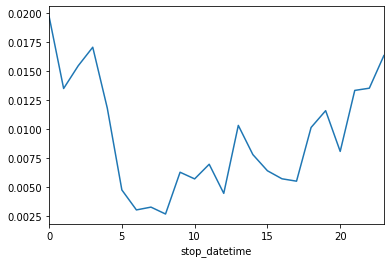

In [112]:
#just put .plot() at the end of a series
ri.groupby(ri["stop_datetime"].dt.hour).mean()["drugs_related_stop"].plot(); #put ";" to the end to avoid text
#shows the percentage of stops by hour

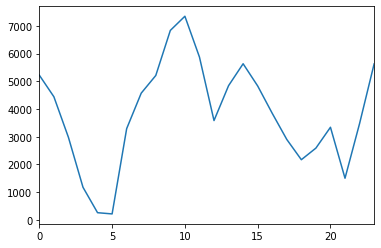

In [116]:
ri["stop_datetime"].dt.hour.value_counts().sort_index().plot();
#Shows all the stops by sorted hour 

# HERE IS THE UNSORTED STUFF (WORK IN PROGRESS)

#### find the bad data in the stop_duration column and fix it

In [143]:
ri.stop_duration.value_counts()
ri.stop_duration.value_counts(dropna=False)
#set the values 1 and 2 to NaN
#ri[(ri.stop_duration == "1")|(ri.stop_duration=="2")]["stop_duration"] = "NaN" #doesnt work
#use loc --> loc[row-condition, column-condition]
ri.loc[(ri.stop_duration == "1")|(ri.stop_duration=="2"), "stop_duration"] = "NaN"
#NaN isnt a string
#we must define something as missing

import numpy as np
ri.loc[ri["stop_duration"]=="NaN", "stop_duration"] = np.nan #or None
ri.stop_duration.value_counts()

#--> Do more .loc[]

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
Name: stop_duration, dtype: int64

### loc, iloc and ix
pick rows and columns eighter by index or label/columnname

In [144]:
#different methods for selecting rows and columns
ufo = pd.read_csv("http://bit.ly/uforeports")

In [145]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [151]:
ufo.loc[0,:] #row 0, all columns
ufo.loc[0:4,:] #loc is inclusive on both sides
ufo.loc[[1,2,3],"City":"State"] #select some columns

,City,Colors Reported,Shape Reported,State
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS


In [156]:
#using loc with booleans
ufo[ufo["City"]=="Oakland"]
#loc
ufo.loc[ufo["City"]=="Oakland", :] #all columns
ufo.loc[ufo["City"]=="Oakland", "State"] # some columns

1694     CA
2144     CA
4686     MD
7293     CA
8488     CA
8768     CA
10816    OR
10948    CA
11045    CA
12322    CA
12941    CA
16803    MD
17322    CA
Name: State, dtype: object

### Iloc

In [161]:
#filter by integer-position --> exclusive the second number!!
ufo.iloc[:,0:3]
ufo.iloc[0:3,:]
#AWARE:
ufo[["City","State"]]
ufo[0:2]
#better:
ufo.loc[:,["City","State"]]
ufo.loc[0:2,:]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


### ix

In [162]:
#the blend, between label and index
drinks = pd.read_csv("http://bit.ly/drinksbycountry", index_col="country")

In [163]:
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [175]:
#If we have strings as index instead of numbers, iloc is confused

drinks.loc["Algeria","beer_servings"] #25
drinks.iloc[2,0] #25
#drinks.ix["Algeria":"Andorra", 0:2]
#dont use ix-depricated
#so, better use:
drinks.loc["Algeria", drinks.columns[0:2]]
drinks.iloc[drinks.index.get_loc("Algeria"), 0:2]

beer_servings      25
spirit_servings     0
Name: Algeria, dtype: object